In [1]:
import numpy as np
import json
import os
import matplotlib.pyplot as plt


In [73]:
def load_json(json_path):
    with open(json_path, 'r') as file:
        data = json.load(file)
    return data

def normalization(keypoints):
    # 만약 2차원이면 3차원으로 만들어서 처리한후, 다시 2차원으로 만들어준다.
    input_shape = keypoints.shape
    if len(input_shape) == 2:
        keypoints = keypoints.reshape(-1,17,2)
    center_head_y = keypoints[:,0,1]
    center_foot_y = (keypoints[:,15,1] + keypoints[:,16,1])/2
    center_foot_00 = (keypoints[:,15,:] + keypoints[:,16,:])/2



    # 1. 15,16번점의 중점을 (0,0)으로 만들어준다.
    keypoints = keypoints - center_foot_00.reshape(-1,1,2)

    # 2. 0번점의 Y축 값과 15,16의 Y축값의 길이를 0과 1로 만들어준다.
    heidht = center_head_y - center_foot_y
    keypoints= keypoints/ heidht.reshape(-1,1,1)

    if len(input_shape) == 2:
        keypoints = keypoints.reshape(17,2)
    return keypoints


def body_drawing(sample , normalized = True):
    # Head 0 ~ 4
    for i in range(5):
        plt.scatter(sample[i, 0],sample[i, 1], s=10, color='red')

    # Body
    plt.plot((sample[5, 0],sample[6, 0]),(sample[5, 1],sample[6, 1]))
    plt.plot((sample[6, 0],sample[12, 0]),(sample[6, 1],sample[12, 1]))
    plt.plot((sample[12, 0],sample[11, 0]),(sample[12, 1],sample[11, 1]))
    plt.plot((sample[11, 0],sample[5, 0]),(sample[11, 1],sample[5, 1]))

    # Left Arm
    plt.plot((sample[5, 0],sample[9, 0]),(sample[5, 1],sample[9, 1]))
    plt.plot((sample[9, 0],sample[7, 0]),(sample[9, 1],sample[7, 1]))
    plt.plot((sample[7, 0],sample[5, 0]),(sample[7, 1],sample[5, 1]))

    # Right Arm
    plt.plot((sample[6, 0],sample[10, 0]),(sample[6, 1],sample[10, 1]))
    plt.plot((sample[10, 0],sample[8, 0]),(sample[10, 1],sample[8, 1]))
    plt.plot((sample[8, 0],sample[6, 0]),(sample[8, 1],sample[6, 1]))

    # Left Leg
    plt.plot((sample[11, 0],sample[13, 0]),(sample[11, 1],sample[13, 1]))
    plt.plot((sample[13, 0],sample[15, 0]),(sample[13, 1],sample[15, 1]))
    plt.plot((sample[15, 0],sample[11, 0]),(sample[15, 1],sample[11, 1]))

    # Right Leg
    plt.plot((sample[12, 0],sample[14, 0]),(sample[12, 1],sample[14, 1]))
    plt.plot((sample[14, 0],sample[16, 0]),(sample[14, 1],sample[16, 1]))
    plt.plot((sample[16, 0],sample[12, 0]),(sample[16, 1],sample[12, 1]))

    if normalized:
        plt.xlim(-0.7, 0.7)
        plt.ylim(-0.2, 1.2)
    plt.grid()


In [74]:
adress = load_json('./dataset/not_address.json')
adress

[{'index': 0,
  'label': 0,
  'keypoints': [[365.2335510253906, 90.93875122070312],
   [374.30706787109375, 84.01028442382812],
   [357.6108093261719, 83.92684936523438],
   [390.54193115234375, 92.27107238769531],
   [349.71844482421875, 92.42330932617188],
   [408.8005065917969, 144.68536376953125],
   [338.0380859375, 145.3163604736328],
   [427.83135986328125, 204.69219970703125],
   [315.4498291015625, 207.10818481445312],
   [441.48333740234375, 258.7708740234375],
   [307.66815185546875, 263.8919677734375],
   [396.33270263671875, 270.0401916503906],
   [348.9356994628906, 269.3201904296875],
   [401.0768737792969, 372.5621337890625],
   [337.0600891113281, 368.9410400390625],
   [397.1689453125, 461.173095703125],
   [323.81231689453125, 457.3135986328125]]},
 {'index': 1,
  'label': 0,
  'keypoints': [[339.78118896484375, 81.37355041503906],
   [348.14556884765625, 73.81155395507812],
   [331.67449951171875, 74.990478515625],
   [364.0298767089844, 82.14822387695312],
   [323.

In [81]:
# Load Json 데이터
label = []
keypoints = []
for i in range(len(adress)):
    label.append(adress[i]['label'])
    keypoints.append(adress[i]['keypoints'])
keypoints = np.array(keypoints) # (N,17,2) ->  인풋
label = np.array(label) # (N,1) -> 아웃풋
 
print(keypoints.shape)
print(label.shape)

(200, 17, 2)
(200,)


In [83]:
normalized_keypoints = normalization(keypoints)
normalized_keypoints.shape

/tmp/ipykernel_17818/3357678700.py:22: RuntimeWarning: divide by zero encountered in divide
  keypoints= keypoints/ heidht.reshape(-1,1,1)
/tmp/ipykernel_17818/3357678700.py:22: RuntimeWarning: invalid value encountered in divide
  keypoints= keypoints/ heidht.reshape(-1,1,1)


(200, 17, 2)

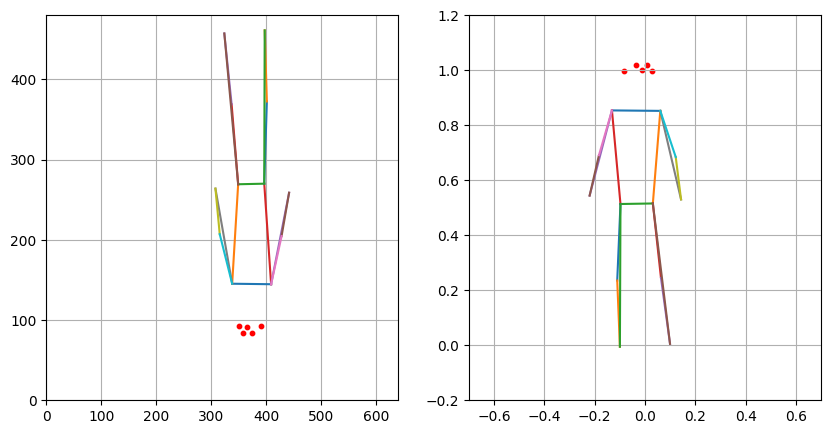

In [85]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
body_drawing(keypoints[0], normalized=False)
plt.xlim(0,640)
plt.ylim(0,480)
plt.subplot(1,2,2)
body_drawing(normalized_keypoints[0], normalized=True)